# How to evaluate embeddings using linear algebra and analogies 

The dimensions of the word and phrase vectors do not have an explicit meaning. However, the embeddings encode similar usage as proximity in the latent space in a way that carries over to semantic relationships. This results in the interesting properties that analogies can be expressed by adding and subtracting word vectors.

Just as words can be used in different contexts, they can be related to other words in different ways, and these relationships correspond to different directions in the latent space. Accordingly, there are several types of analogies that the embeddings should reflect if the training data permits.

The word2vec authors provide a list of several thousand relationships spanning aspects of geography, grammar and syntax, and family relationships to evaluate the quality of embedding vectors (see directory [analogies](data/analogies)).

## Imports

In [103]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Settings

                                    n            a             b            c  \
category                                                                        
: capital-common-countries       1813       athens        greece      baghdad   
: capital-world                  1813     belgrade        serbia     budapest   
: city-in-state                  1813     gaborone      botswana     valletta   
: currency                       1813       maputo    mozambique       muscat   
: family                         1813        sofia      bulgaria       dublin   
: gram1-adjective-to-adverb      1813      chicago      illinois       dallas   
: gram2-opposite                 1813  minneapolis     minnesota     stockton   
: gram3-comparative              1813   shreveport     louisiana      phoenix   
: gram4-superlative              1813    policeman   policewoman       father   
: gram5-present-participle       1813   productive  unproductive  competitive   
: gram6-nationality-adjectiv

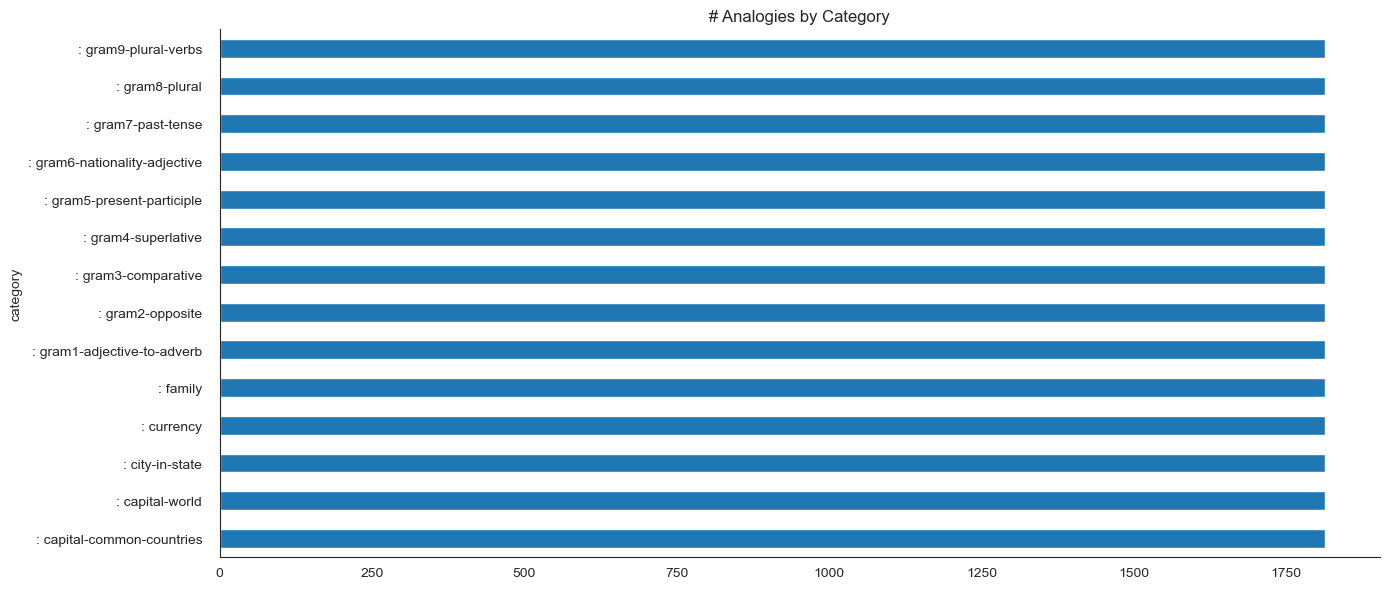

In [106]:
# Import necessary libraries
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_style('white')
pd.set_option('float_format', '{:,.2f}'.format)
np.random.seed(42)

# Path to analogies file
analogy_path = Path('data', 'analogies-en.txt')

# Load the data
df = pd.read_csv(analogy_path, header=None, names=['Section'])

# Create a mask to separate categories (rows starting with ':')
categories_mask = df['Section'].str.startswith(':')

# Extract categories and create a separate DataFrame
categories = df[categories_mask].copy().reset_index(drop=True)
categories.columns = ['category']

# Extract analogies (rows that are not categories)
analogies = df[~categories_mask].copy().reset_index(drop=True)

# Split the analogies into four columns (for word1, word2, word3, word4)
analogies = analogies['Section'].str.split(expand=True)

# Rename columns to 'a', 'b', 'c', 'd' for the analogy structure
analogies.columns = list('abcd')

# Repeat the 'categories' DataFrame to align with the length of 'analogies'
categories_repeated = pd.DataFrame({
    'category': categories['category'].repeat(len(analogies) // len(categories)).reset_index(drop=True)
})

# Concatenate the categories and analogies DataFrames horizontally
df_final = pd.concat([categories_repeated, analogies], axis=1)

# Group by 'category' to get the count of analogies in each category
analogy_cnt = df_final.groupby('category').size().sort_values(ascending=False).to_frame('n')

# Get the first analogy example for each category
analogy_example = df_final.groupby('category').first()

# Join the count and the first example of analogies by category
final_result = analogy_cnt.join(analogy_example)

# Display the final result
print(final_result)

# Plot the number of analogies by category
final_result['n'].sort_values().plot.barh(title='# Analogies by Category', figsize=(14, 6))
sns.despine()
plt.tight_layout()
plt.show()


In [92]:
sns.set_style('white')
pd.set_option('float_format', '{:,.2f}'.format)
np.random.seed(42)

In [93]:
analogy_path = Path('data', 'analogies-en.txt')

In [94]:
def format_time(t):
    m, s = divmod(t, 60)
    h, m = divmod(m, 60)
    return f'{h:02.0f}:{m:02.0f}:{s:02.0f}'

## Evaluation: Analogies

In [95]:
df.head()

,Section,a,b,c,d,category
1,: capital-world,athens,greece,baghdad,iraq,capital-common-countries
2,: city-in-state,athens,greece,bangkok,thailand,capital-common-countries
3,: currency,athens,greece,beijing,china,capital-common-countries
4,: family,athens,greece,berlin,germany,capital-common-countries
5,: gram1-adjective-to-adverb,athens,greece,bern,switzerland,capital-common-countries


In [96]:
analogies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 1 to 25405
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   a         25392 non-null  object
 1   b         25392 non-null  object
 2   c         25392 non-null  object
 3   d         25392 non-null  object
 4   category  25392 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [101]:
# Load the data
df = pd.read_csv(analogy_path, header=None, names=['Section'])

# Separate categories (rows starting with ':') from the analogies
categories = df[df['Section'].str.startswith(':')].reset_index(drop=True)

# The rows that don't start with ':' are the actual analogies
analogies = df[~df['Section'].str.startswith(':')].copy()

# Split the analogies into four columns (for word1, word2, word3, word4)
analogies = analogies['Section'].str.split(expand=True)

# Rename columns to 'a', 'b', 'c', 'd' for the analogy structure
analogies.columns = list('abcd')

# Set the first category as "capital-common-countries"
analogies['category'] = "capital-common-countries"

# Now, format the final DataFrame and display it
df_final = analogies.copy()

# Display the final formatted DataFrame
df_final.head()


In [102]:
df = pd.concat([categories, analogies], axis=1)
df.category = df.category.ffill()
df = df[df['a'].notnull()]
df.head()

AttributeError: 'DataFrame' object has no attribute 'category'

In [99]:
analogy_cnt = df.groupby('category').size().sort_values(ascending=False).to_frame('n')
analogy_example = df.groupby('category').first()

In [100]:
analogy_cnt.join(analogy_example)

,n,Section,a,b,c,d
category,,,,,,
capital-common-countries,25392,: capital-world,athens,greece,baghdad,iraq


In [90]:
analogy_cnt.join(analogy_example)['n'].sort_values().plot.barh(title='# Analogies by Category',
                                                               figsize=(14, 6))
sns.despine()
plt.tight_layout()